<a href="https://colab.research.google.com/github/tinanano19/melo/blob/master/CONTORNO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
# importar librerias

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


# grafica imagenes estaticas en el notebook
%matplotlib inline 

In [3]:
path='/content/drive/My Drive/melo/'
os.chdir(path)
!pwd
#Graficar imagenes estaticas en el notebook
%matplotlib inline

/content/drive/My Drive/melo


In [0]:
#Display four images
def displayGray1(a, b, c, title1='Original', title2='Editada1', title3='Editada2'):
    plt.figure(figsize=(10,10))
    plt.subplot(221), plt.imshow(a, cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(222), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(223), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayGray2(a, b, title1='Original', title2='Editada1'):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayColor1(a, b, c, title1='Original', title2='Editada1', title3='Editada2'):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayColor2(a, b, title1='Original', title2='Editada1'):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def readRGB(imgPath):
      img = cv2.imread(imgPath)
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      return img
    
def displayColor4(a, b, c, d, title1='Original', title2='Editada1', title3='Editada2', title4='Editada2' ):
    plt.figure(figsize=(10,10))
    plt.subplot(221), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(222), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(223), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(224), plt.imshow(d), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.show()    
    
def display4(a, b, c, d, title1='Original', title2='Editada1', title3='Editada2', title4='Editada3'):
    plt.figure(figsize=(15,15))
    plt.subplot(221), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(222), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(223), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(224), plt.imshow(d,cmap='gray'), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    

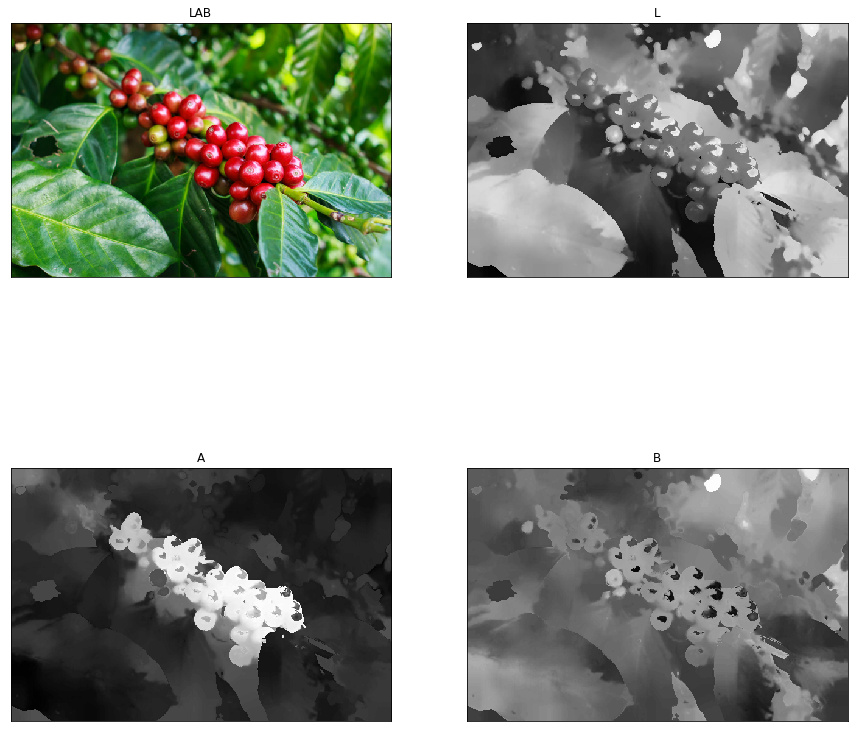

In [0]:
name = 'cafeto.jpg'

img = cv2.imread(name,cv2.IMREAD_COLOR)
IMG_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#shifted = cv2.pyrMeanShiftFiltering(IMG_RGB, 21, 51)
R,G,B = cv2.split(shifted)

IMG_LAB = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
shifted = cv2.pyrMeanShiftFiltering(IMG_LAB, 21, 51)
L,A,B = cv2.split(shifted)

img_HSV = cv2.cvtColor(shifted, cv2.COLOR_BGR2HSV)
#shifted = cv2.pyrMeanShiftFiltering(img_HSV, 21, 51)
H,S,V = cv2.split(shifted)



display4(IMG_RGB, L, A, B, "LAB", "L", "A", "B" )


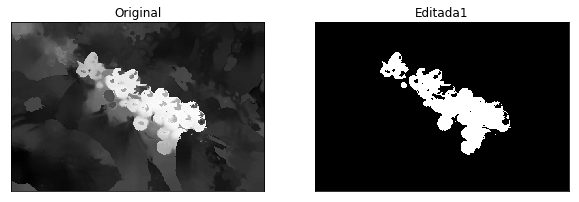

In [0]:
def Threshold(img, thres):
    #cargar imagen
    img0 = cv2.imread('cafeto.jpg',cv2.IMREAD_COLOR)
    img_LAB = cv2.cvtColor(img0,cv2.COLOR_BGR2LAB)
    L,A,B = cv2.split(img_LAB)
    rows, columns = A.shape
    img2 = np.zeros( (rows,columns), dtype = np.uint8)
    
    #intervalos
    T=thres
    
    for x in range(0,rows):
      for y in range(0, columns):
        r=img[x][y]
        if T <= r:
          img2[x][y]=255
        else:
          img2[x][y] = 0
    displayGray2(img, img2)
    return
  
Threshold(A, 155)
          

In [0]:
gP = np.array(255*(g/255)**2.2,dtype='uint8')
gP = Threshold(gP,100)
gP_copy.copy(gP)

_, countours, _ = cv2.findCountours(image = gP, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)
img_con = cv2.drawCountours(image = img_RGBCopy, contours = contours, contourIdx = -1, color = (0,0,255), thickness = 2)

#areas=[]
contours2Filter=[]
contourok=[]

for idx,c in enumerate(contours):
  area=cv2.contourArea(c)
  
  if area <= 30:
    contour2Filter.append(c)
  else:
    contourok.append(c)
    
M_R=cv2.drawCountours(image = gP, contours = contours2Filter, contourIdx = -1, color = (0,0,0), thickness=-1)

new_img=cv2.bitwise_and(img_RGBCopy, img_RGBCopy,mask=M_R)
display4(gP_,M_R,img_con,new_im,"gP","r","g","b")

NameError: ignored

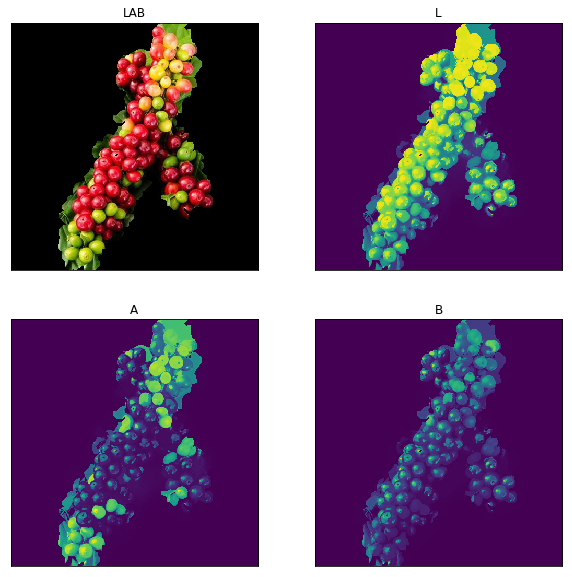

In [24]:
name = 'se_cafe1.jpg'

img = cv2.imread(name,cv2.IMREAD_COLOR)
IMG_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
shifted = cv2.pyrMeanShiftFiltering(IMG_RGB, 21, 51)
R,G,B = cv2.split(shifted)

IMG_LAB = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
#shifted = cv2.pyrMeanShiftFiltering(IMG_LAB, 21, 51)
#L,A,B = cv2.split(shifted)

img_HSV = cv2.cvtColor(shifted, cv2.COLOR_BGR2HSV)
#shifted = cv2.pyrMeanShiftFiltering(img_HSV, 21, 51)
H,S,V = cv2.split(shifted)



displayColor4(IMG_RGB, R,G,B, "LAB", "L", "A", "B" )

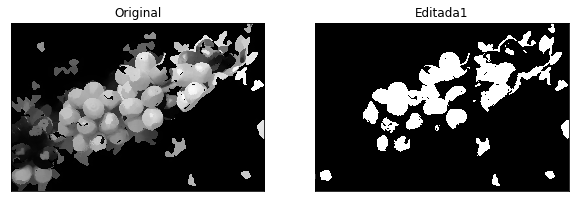

In [20]:
def Threshold(img, thres):
    #cargar imagen
    img0 = cv2.imread('se_cafe4.jpg',cv2.IMREAD_COLOR)
    IMG_RGB = cv2.cvtColor(img0,cv2.COLOR_BGR2RGB)
    R, G ,B = cv2.split(IMG_RGB)
    rows, columns = G.shape
    img2 = np.zeros( (rows,columns), dtype = np.uint8)
    
    #intervalos
    T=thres
    
    for x in range(0,rows):
      for y in range(0, columns):
        r=img[x][y]
        if T <= r:
          img2[x][y]=255
        else:
          img2[x][y] = 0
    displayGray2(img, img2)
    return
  
Threshold(G, 155)

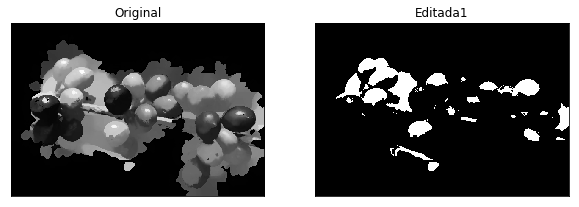

In [23]:
def Threshold(img, thres):
    #cargar imagen
    img0 = cv2.imread('se_cafe5.jpg',cv2.IMREAD_COLOR)
    IMG_RGB = cv2.cvtColor(img0,cv2.COLOR_BGR2RGB)
    R, G ,B = cv2.split(IMG_RGB)
    rows, columns = G.shape
    img2 = np.zeros( (rows,columns), dtype = np.uint8)
    
    #intervalos
    T=thres
    
    for x in range(0,rows):
      for y in range(0, columns):
        r=img[x][y]
        if T <= r:
          img2[x][y]=255
        else:
          img2[x][y] = 0
    displayGray2(img, img2)
    return
  
Threshold(G, 155)

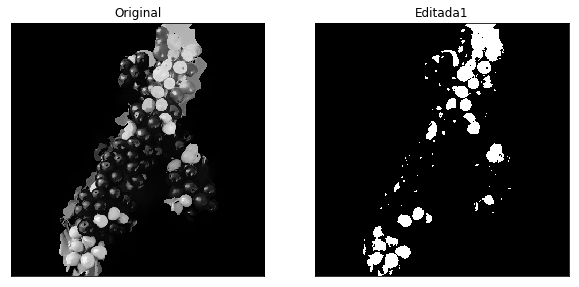

In [26]:
def Threshold(img, thres):
    #cargar imagen
    img0 = cv2.imread('se_cafe1.jpg',cv2.IMREAD_COLOR)
    IMG_RGB = cv2.cvtColor(img0,cv2.COLOR_BGR2RGB)
    R, G ,B = cv2.split(IMG_RGB)
    rows, columns = G.shape
    img2 = np.zeros( (rows,columns), dtype = np.uint8)
    
    #intervalos
    T=thres
    
    for x in range(0,rows):
      for y in range(0, columns):
        r=img[x][y]
        if T <= r:
          img2[x][y]=255
        else:
          img2[x][y] = 0
    displayGray2(img, img2)
    return
  
Threshold(G, 155)

In [27]:
(x,y,w,h) = cv2.boundingRect(cntr(0))
cv2.rectangle(img_RGBCopyIII, (x,y),(x+w,y+h),(255,0,0), 2)
left,top,right,bottom=x,y,x+30,y+10
font = cv2.FONT_HERSHEY_SIMPLEX
font_size = 0.3
font_color = (255,255,255)
cv2.rectangle(img_RGBCopyIII,(left,top),(right,bottom),(125,125,125,0.8),-1,1)
cv2.rectangle(img_RGBCopyIII,(left,top+20),(right,bottom+20)(125,125,125,0.6),-1,1)
cv2.putText(img_RGBCopyIII,"Ripe",(left+3,top+12),font,font_size,font_color,1,cv2.LINE_AA)
cv2.putText(img_RGBCopyIII,str(80)+"%",(left+3,top+32),font,font_size,font_color,1,cv2.LINE_AA)

NameError: ignored